# **Load Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# **Load Dataset**

In [ ]:
breast_df = pd.read_csv('/content/data.csv')
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
breast_df.shape

(569, 33)

In [ ]:
breast_df.tail(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


# **EDA**

In [ ]:
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Convert columns with 'Confidential' to numeric, replacing invalid values with NaN
for column in breast_df.columns:
    if breast_df[column].dtype == 'object':  # Check if column is of type object (string)
        try:
            # Attempt to convert to numeric, replacing 'Confidential' with NaN
            breast_df[column] = pd.to_numeric(breast_df[column].str.replace('Confidential', 'NaN'), errors='coerce')
        except ValueError:
            # If conversion fails, leave the column as is
            pass

# Now calculate the correlation
corr = breast_df.corr()
corr.style.background_gradient(cmap='coolwarm')

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3807: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3808: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,nan,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,nan
diagnosis,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
radius_mean,0.074626,nan,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,nan
texture_mean,0.099770,nan,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,nan
perimeter_mean,0.073159,nan,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,nan
area_mean,0.096893,nan,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,nan
smoothness_mean,-0.012968,nan,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,nan
compactness_mean,0.000096,nan,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,nan
concavity_mean,0.050080,nan,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,nan
concave points_mean,0.044158,nan,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,nan


<ipython-input-58-9d95de79a689>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=breast_df, palette='Set2')


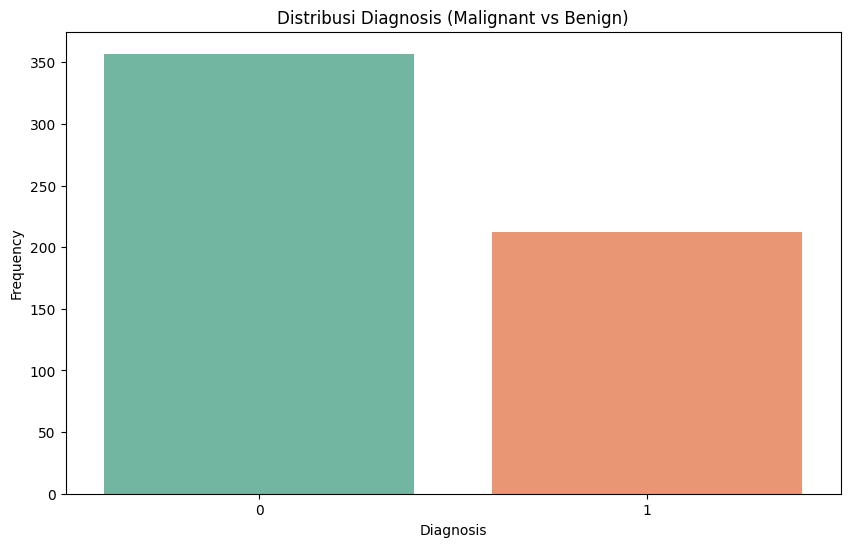

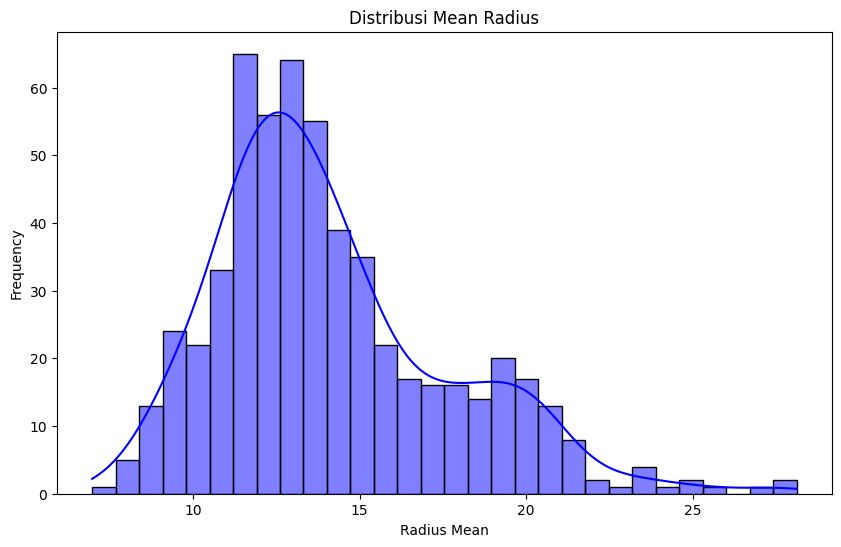

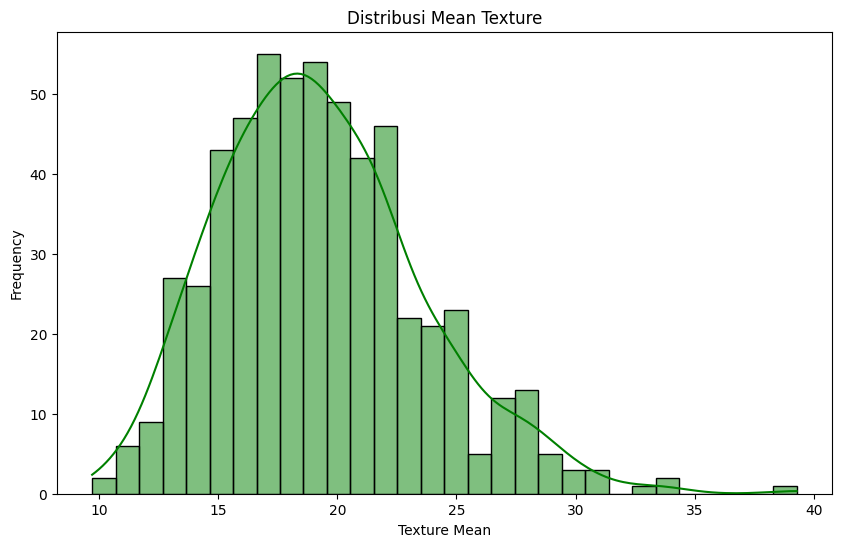

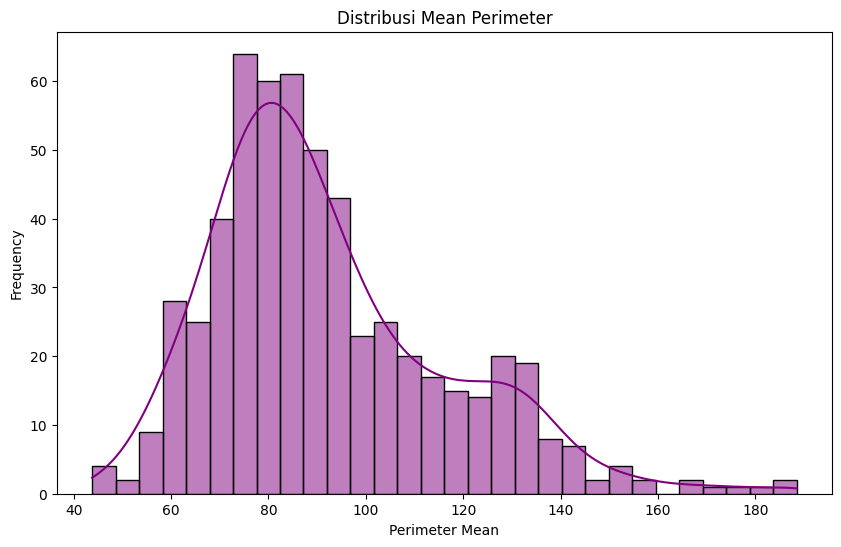

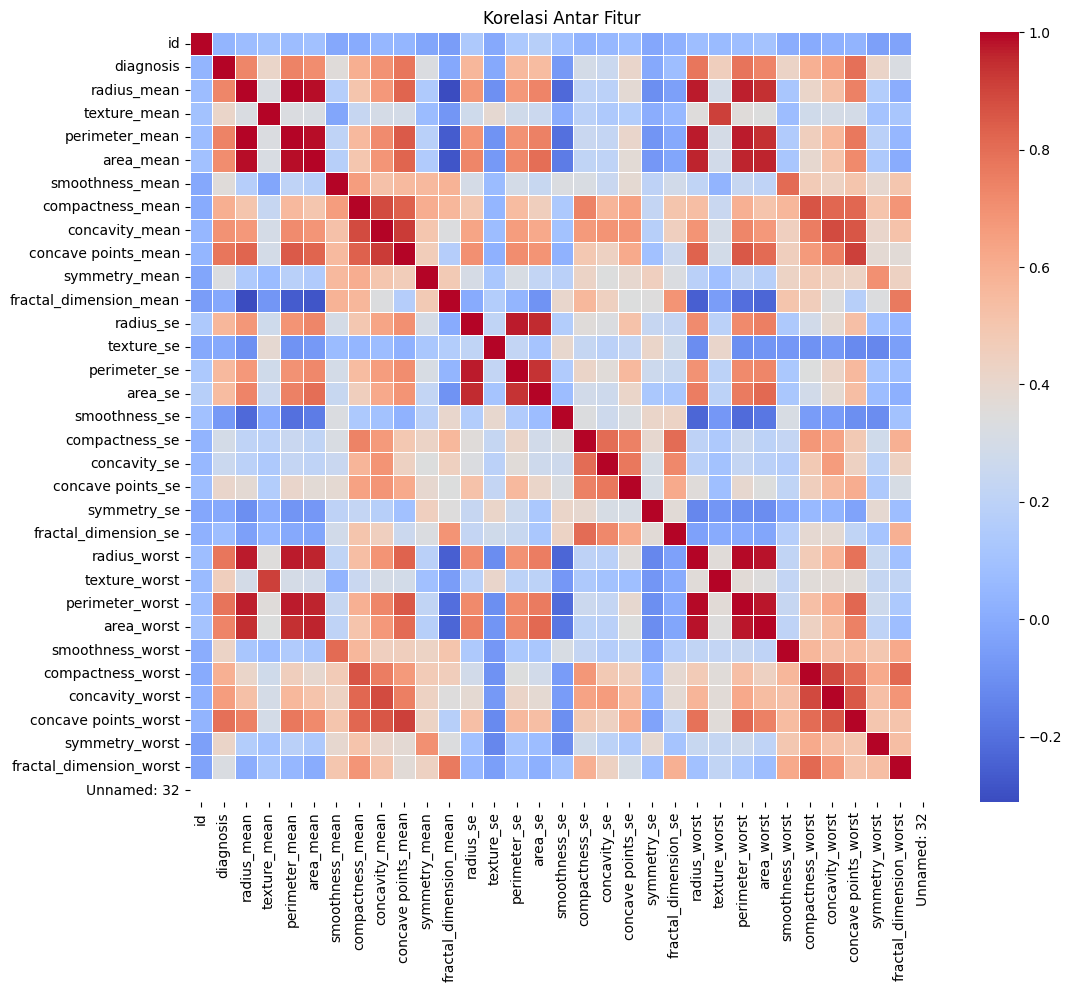

In [ ]:
# Distribusi Diagnosis
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=breast_df, palette='Set2')
plt.title('Distribusi Diagnosis (Malignant vs Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.show()

# Distribusi Mean Radius
plt.figure(figsize=(10, 6))
sns.histplot(breast_df['radius_mean'], kde=True, bins=30, color='blue')
plt.title('Distribusi Mean Radius')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

# Distribusi Mean Texture
plt.figure(figsize=(10, 6))
sns.histplot(breast_df['texture_mean'], kde=True, bins=30, color='green')
plt.title('Distribusi Mean Texture')
plt.xlabel('Texture Mean')
plt.ylabel('Frequency')
plt.show()

# Distribusi Mean Perimeter
plt.figure(figsize=(10, 6))
sns.histplot(breast_df['perimeter_mean'], kde=True, bins=30, color='purple')
plt.title('Distribusi Mean Perimeter')
plt.xlabel('Perimeter Mean')
plt.ylabel('Frequency')
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(12, 10))
corr = breast_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur')
plt.show()

## Fitur dengan Target

Korelasi Fitur dengan Target (diagnosis):
diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se  

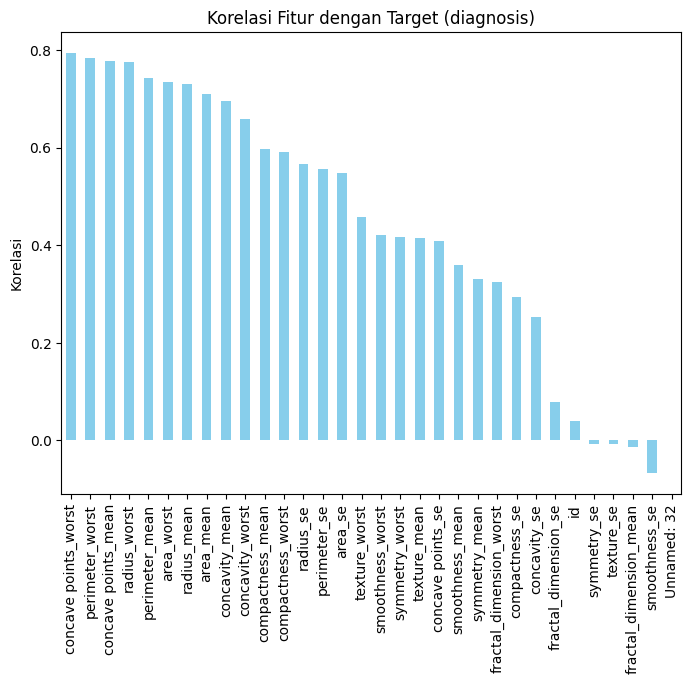

In [ ]:
# Korelasi antara fitur dan target
correlation_with_target = breast_df.corr()['diagnosis'].sort_values(ascending=False)

# Menampilkan korelasi
print("Korelasi Fitur dengan Target (diagnosis):")
print(correlation_with_target)

# Visualisasi korelasi fitur dengan target
plt.figure(figsize=(8, 6))
correlation_with_target.drop('diagnosis').plot(kind='bar', color='skyblue')
plt.title('Korelasi Fitur dengan Target (diagnosis)')
plt.ylabel('Korelasi')
plt.show()

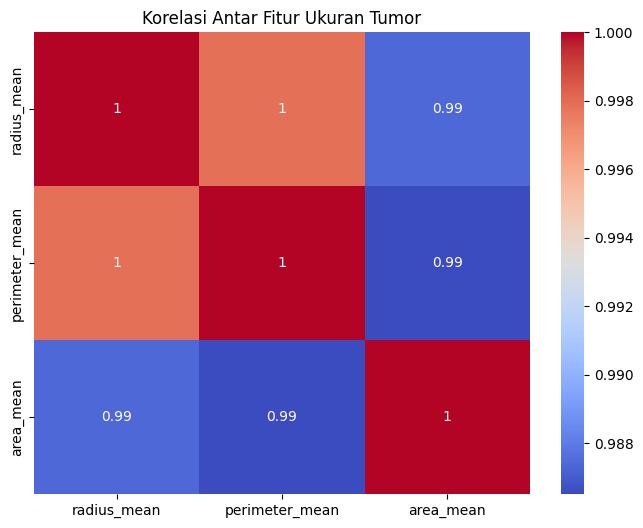

In [ ]:
# Subset fitur ukuran tumor
index = ['radius_mean', 'perimeter_mean', 'area_mean']

# Korelasi antar fitur ukuran
correlation_size = breast_df[index].corr()

# Heatmap korelasi ukuran tumor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_size, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur Ukuran Tumor')
plt.show()

In [ ]:
breast_df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


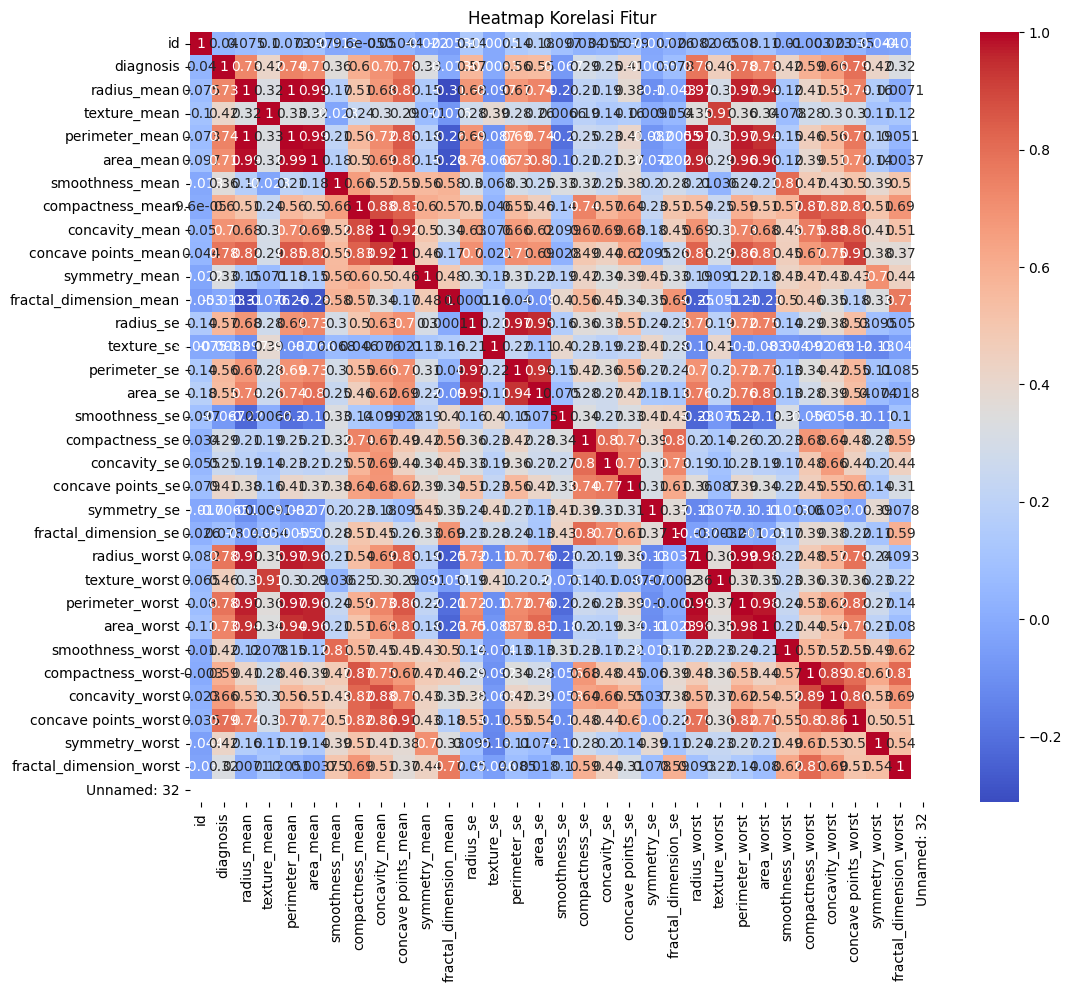

In [ ]:
# Visualisasi korelasi antar fitur
plt.figure(figsize=(12, 10))
sns.heatmap(breast_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **Pre-Processing**

## **Hapus Kolom Tidak Diperlukan**

In [ ]:
# Hapus kolom yang tidak diperlukan
breast_df = breast_df.drop(columns=['id', 'Unnamed: 32'])
breast_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,NaN,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,NaN,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,NaN,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,NaN,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##**Seleksi Fitur**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

breast_df = pd.read_csv('/content/data.csv')

# Memisahkan fitur (X) dan target (y)
X = breast_df.drop(columns=['diagnosis'])
y = breast_df['diagnosis']

y = y.map({'M': 1, 'B': 0})


In [ ]:
# Model dasar untuk seleksi fitur
model = RandomForestClassifier(random_state=42)

# Seleksi fitur dengan RFE
rfe = RFE(estimator=model, n_features_to_select=3)
rfe.fit(X, y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang terpilih:", selected_features)

Fitur yang terpilih: Index(['radius_worst', 'perimeter_worst', 'concave points_worst'], dtype='object')


## **Checking Type of Data**

In [ ]:
breast_df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


## **Encoding Target**

In [ ]:
# Konversi kolom diagnosis menjadi numerik
breast_df['diagnosis'] = breast_df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
breast_df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212


## **Cek Null**

In [ ]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
breast_df.isna().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


## **Cek Duplikat**

In [ ]:
print(f"Jumlah data: {breast_df.shape[0]}")
print(f"Jumlah data kosong : {breast_df.isna().sum().to_dict()}")
print(f"Jumlah data duplicated : {breast_df.duplicated().sum()}")

Jumlah data: 569
Jumlah data kosong : {'id': 0, 'diagnosis': 0, 'radius_mean': 0, 'texture_mean': 0, 'perimeter_mean': 0, 'area_mean': 0, 'smoothness_mean': 0, 'compactness_mean': 0, 'concavity_mean': 0, 'concave points_mean': 0, 'symmetry_mean': 0, 'fractal_dimension_mean': 0, 'radius_se': 0, 'texture_se': 0, 'perimeter_se': 0, 'area_se': 0, 'smoothness_se': 0, 'compactness_se': 0, 'concavity_se': 0, 'concave points_se': 0, 'symmetry_se': 0, 'fractal_dimension_se': 0, 'radius_worst': 0, 'texture_worst': 0, 'perimeter_worst': 0, 'area_worst': 0, 'smoothness_worst': 0, 'compactness_worst': 0, 'concavity_worst': 0, 'concave points_worst': 0, 'symmetry_worst': 0, 'fractal_dimension_worst': 0, 'Unnamed: 32': 569}
Jumlah data duplicated : 0


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Membaca dataset yang sudah dibersihkan
data_path = '/content/data.csv'
df = pd.read_csv(data_path)

# Misalkan 'diagnosis' adalah target (y), dan sisanya adalah fitur (X)
X = df.drop(columns=['diagnosis'])  # Semua kolom kecuali 'diagnosis'
y = df['diagnosis']  # Kolom target 'diagnosis'

# Inisialisasi model (misalnya, RandomForestClassifier)
model = RandomForestClassifier()

# Seleksi fitur dengan RFE (Recursive Feature Elimination)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Menampilkan fitur yang terpilih
selected_features = X.columns[rfe.support_]
print("Fitur yang terpilih:", selected_features)

Fitur yang terpilih: Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


# **Detecting Outlier**

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

breast_df = pd.read_csv('/content/data.csv')

# Hapus kolom yang tidak relevan
breast_df = breast_df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

# Hitung z-score untuk setiap fitur numerik
z_scores = breast_df.drop(columns=['diagnosis']).apply(zscore)

# Threshold untuk mendeteksi outlier
threshold = 3

# Deteksi outlier
outliers = (z_scores.abs() > threshold)

# Menampilkan jumlah outlier di setiap fitur
print("Jumlah outlier per fitur:")
print(outliers.sum())

# Menampilkan baris dengan outlier
print("\nData dengan outlier:")
print(breast_df[outliers.any(axis=1)])

In [ ]:
breast_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Balancing**

<ipython-input-29-29ec40443ec9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis",data=breast_df, palette="Reds")


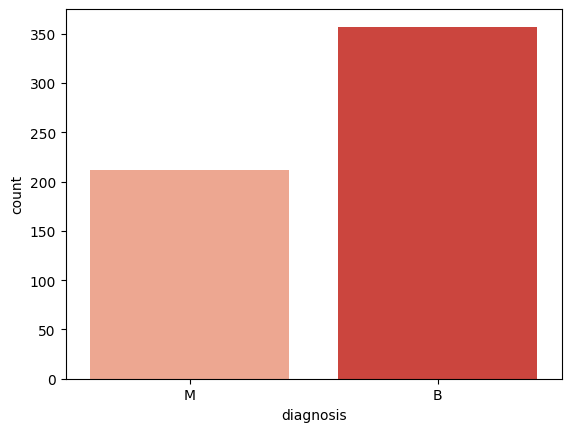

In [ ]:
breast_df['diagnosis'].value_counts()
sns.countplot(x="diagnosis",data=breast_df, palette="Reds")
plt.show()

# **Oversampling: SMOTE**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.impute import SimpleImputer

# Memuat dataset Breast Cancer (misalnya, dataset dari scikit-learn)
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
breast_df = pd.DataFrame(data.data, columns=data.feature_names)
breast_df['diagnosis'] = data.target

# Memisahkan fitur dan target
X = breast_df.drop(columns=['diagnosis'])
y = breast_df['diagnosis']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Imputasi nilai yang hilang menggunakan SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Menggunakan mean untuk imputasi
X_train_imputed = imputer.fit_transform(X_train)  # Mengimputasi data latih
X_test_imputed = imputer.transform(X_test)  # Mengimputasi data uji (gunakan transform)

# Menampilkan distribusi kelas sebelum balancing
print("Distribusi Kelas Sebelum Balancing:", Counter(y_train))

# 2. Metode SMOTE untuk Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imputed, y_train)

# Menampilkan distribusi kelas setelah balancing
print("Distribusi Kelas Setelah Balancing:", Counter(y_train_smote))

# 3. Melatih model dengan data yang telah di-balance
model = RandomForestClassifier(random_state=42)
model.fit(X_train_smote, y_train_smote)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_imputed)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:\n", cm)

# Menghitung akurasi
accuracy = (cm[0, 0] + cm[1, 1]) / cm.sum()
print(f"Akurasi: {accuracy:.4f}")


Distribusi Kelas Sebelum Balancing: Counter({1: 286, 0: 169})
Distribusi Kelas Setelah Balancing: Counter({1: 286, 0: 286})


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Confusion Matrix:
 [[41  2]
 [ 2 69]]
Akurasi: 0.9649


# **Train-Test-Split**

In [ ]:
# Pastikan tidak ada nilai NaN pada target
y = y.dropna()  # Menghapus NaN jika ada

# Memastikan dimensi setelah menghapus NaN
print("Dimensi setelah menghapus NaN di y:", y.shape)

# Lakukan pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Dimensi setelah menghapus NaN di y: (569,)


In [ ]:
# Pastikan dimensi fitur X sesuai
print("Dimensi X:", X.shape)
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)

Dimensi X: (569, 30)
Dimensi X_train: (455, 30)
Dimensi X_test: (114, 30)


In [ ]:
print("Isi y_train:", y_train.head())
print("Isi y_test:", y_test.head())


Isi y_train: 546    1
432    0
174    1
221    1
289    1
Name: diagnosis, dtype: int64
Isi y_test: 256    0
428    1
501    0
363    1
564    0
Name: diagnosis, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek dimensi setelah pembagian
print("Dimensi X_train:", X_train.shape)
print("Dimensi X_test:", X_test.shape)
print("Dimensi y_train:", y_train.shape)
print("Dimensi y_test:", y_test.shape)


In [ ]:
# Pisahkan fitur dan target
X = breast_df.drop(columns=['diagnosis'])  # Semua kolom kecuali diagnosis
y = breast_df['diagnosis']  # Kolom target

In [ ]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Distribusi Target di y_train:")
print(y_train.value_counts())

print("Distribusi Target di y_test:")
print(y_test.value_counts())

# **Training Model**

In [ ]:
print(X_train.columns)

In [ ]:
model.fit(pd.DataFrame(X_train, columns=['radius_mean']), y_train)

In [ ]:
print(X_train.shape)  # Ukuran data training
print(X_test.shape)   # Ukuran data testing
print(y_train.value_counts())  # Jumlah kelas dalam data training

# **Model**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Memuat dataset (misalnya, Breast Cancer Wisconsin dataset)
breast_df = pd.read_csv("/content/data.csv")  # Ganti dengan path dataset Anda

# Memisahkan fitur dan target
X = breast_df.drop(columns=['diagnosis'])
y = breast_df['diagnosis']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:\n", cm)

# Menghitung TP, TN, FP, FN
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

# Menghitung akurasi
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(f"Akurasi: {accuracy:.4f}")


Confusion Matrix:
 [[70  1]
 [ 3 40]]
Akurasi: 0.9649


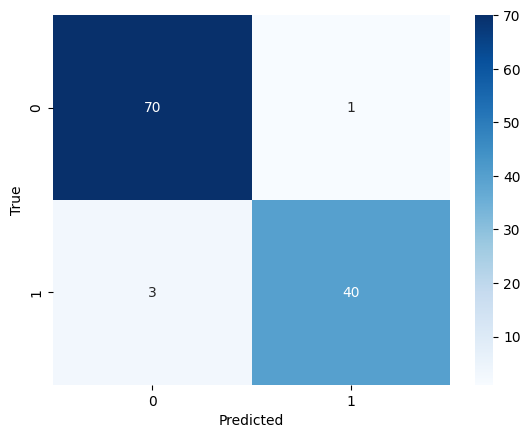

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Evaluasi**

In [ ]:
# Definisikan nama fitur dari DataFrame asli
feature_names = X_train.columns  # Pastikan X_train adalah DataFrame

# Latih model menggunakan DataFrame
model.fit(pd.DataFrame(X_train, columns=feature_names), y_train)

# Prediksi pada data uji
y_pred = model.predict(pd.DataFrame(X_test, columns=feature_names))

# Evaluasi model
from sklearn.metrics import classification_report
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        71
           M       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## **Evaluasi Metriks**

In [ ]:
# Identifikasi perbedaan kolom antara X_train dan X_test
missing_features = set(X_train.columns) - set(X_test.columns)
extra_features = set(X_test.columns) - set(X_train.columns)

print("Fitur yang hilang di X_test:", missing_features)
print("Fitur tambahan di X_test:", extra_features)

# Sinkronkan fitur pada X_test
if extra_features:
    X_test = X_test.drop(columns=extra_features)  # Hapus fitur tambahan pada X_test

if missing_features:
    for feature in missing_features:
        X_test[feature] = 0  # Tambahkan fitur yang hilang ke X_test, isi dengan nilai default (misalnya, 0)

# Pastikan jumlah fitur sesuai
print("Fitur X_train:", X_train.shape[1])
print("Fitur X_test:", X_test.shape[1])

# Prediksi ulang
y_pred = model.predict(X_test)

# Evaluasi Model
from sklearn.metrics import classification_report
print("Laporan Klasifikasi:")
print(classification_report(y_test, y_pred))
